In [1]:
import os, sys

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root:", project_root)

Project root: /Users/ipekdalgic/Desktop/alzheimer-mri-classification


In [2]:
import numpy as np
from src.dataset import load_dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
X, y, class_names = load_dataset(
    data_root="../data/raw",
    use_autocontrast=True,
    normalize=True,
    limit_per_class=50,
)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique labels:", set(y))

Loaded 50 images from class 'MildDemented' (label=1).
Loaded 50 images from class 'ModerateDemented' (label=1).
Loaded 50 images from class 'NonDemented' (label=0).
Loaded 50 images from class 'VeryMildDemented' (label=1).
Final dataset shape: (200, 208, 176)
Label vector shape: (200,)
X shape: (200, 208, 176)
y shape: (200,)
Unique labels: {np.int32(0), np.int32(1)}


In [4]:
N, H, W = X.shape
X_flat = X.reshape(N, H * W)  # (N, 208*176)

print("X_flat shape:", X_flat.shape)

X_flat shape: (200, 36608)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_flat,
    y,
    test_size=0.2,      # %20 test
    random_state=42,
    stratify=y,         # sınıf oranlarını koru
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 160
Test size: 40


In [6]:
log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,       # varsa tüm CPU çekirdeklerini kullan
)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [7]:
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Test accuracy:", acc)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.65

Classification report:
              precision    recall  f1-score   support

           0       0.17      0.10      0.12        10
           1       0.74      0.83      0.78        30

    accuracy                           0.65        40
   macro avg       0.45      0.47      0.45        40
weighted avg       0.59      0.65      0.62        40

Confusion matrix:
[[ 1  9]
 [ 5 25]]


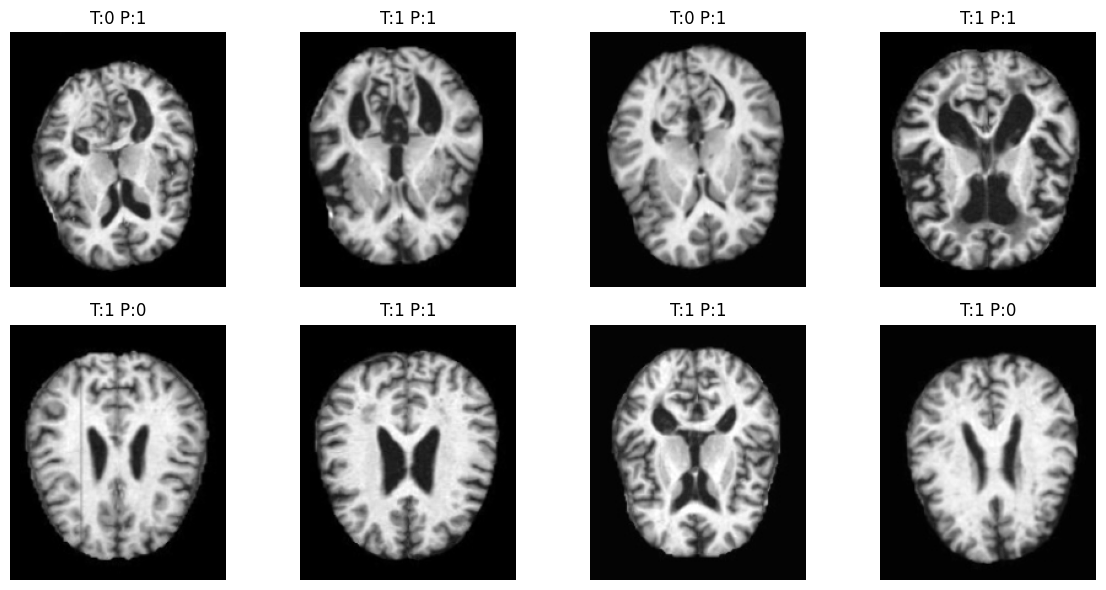

In [8]:
import matplotlib.pyplot as plt

# İlk 8 test örneğini gösterelim
n_show = 8
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, ax in enumerate(axes.ravel()):
    if i >= n_show:
        break
    idx = i  # X_test içindeki indeks (karışmış durumda)
    img = X_test[idx].reshape(H, W)
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(f"T:{true_label} P:{pred_label}")

plt.tight_layout()
plt.show()